# Diagnosing the data issues:

In [1]:
import pandas as pd 
import numpy as np 
% matplotlib inline
from numpy.random import normal
from numpy.random import exponential
from numpy.random import choice
from matplotlib import pyplot as plt 

In [2]:
def plot_standard_deviations(data, label):
    ax = data.hist(bins=40, figsize=(16,4))

    ax.axvspan(data.mean() - data.std(), 
               data.mean() + data.std(), 
               alpha=0.4, 
               color='green')

    ax.axvspan(data.mean() - 2*data.std(), 
               data.mean() + 2*data.std(), 
               alpha=0.3, 
               color='yellow')


    ax.axvspan(data.mean() - 3*data.std(), 
               data.mean() + 3*data.std(), 
               alpha=0.2, 
               color='red')
    
    plt.xlabel(label)
    plt.ylabel('Count')
    plt.ylabel('Number of observations')

In [3]:
def print_analysis(series):
    for nr in range(1, 4):
        
        upper_limit = series.mean() + (nr * series.std())
        lower_limit = series.mean() - (nr * series.std())
        
        in_range = (series < upper_limit) & (series > lower_limit)
        percent_in_range = in_range.sum() / len(series)
        
        print('%0.5f%% of the dataset is under %0.0f SDs from the mean (%0.0f)' %(
                percent_in_range*100, nr, upper_limit))

# The data you'll be exloring:

In [4]:
data = pd.read_csv('data/all_data.csv', index_col=0)

In [5]:
data.head(10)

,age,height,gender
CFLOXRHMDR,88.0,163.0,female
FXLJSNLSOG,29.0,158.0,female
FWDIVJKGOI,42.0,159.0,female
YWEBKQWHRE,25.0,179.0,male
YPUQAPSOYJ,32.0,169.0,male
YPUQAPSOYJ,32.0,169.0,male
YPUQAPSOYJ,32.0,169.0,male
YPUQAPSOYJ,32.0,169.0,male
SSZQEGTLNK,NaN,162.0,male
PRFEFXNGWN,36.0,166.0,female


### Duplicated data: 

We seem to have a problem with some duplicated data: 

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.head(10)

,age,height,gender
CFLOXRHMDR,88.0,163.0,female
FXLJSNLSOG,29.0,158.0,female
FWDIVJKGOI,42.0,159.0,female
YWEBKQWHRE,25.0,179.0,male
YPUQAPSOYJ,32.0,169.0,male
SSZQEGTLNK,NaN,162.0,male
PRFEFXNGWN,36.0,166.0,female
IIVXDNOAIV,1.0,165.0,female
VVQYVNRAGQ,18.0,134.0,female
YVEDWPTEEB,31.0,149.0,female


## Missing data: 

In [8]:
heights = data['height']
ages = data['age']
gender = data['gender']

##### How much missing data do we have for heights? 

In [9]:
missing_height = heights.isnull()

In [10]:
missing_height.head()

CFLOXRHMDR    False
FXLJSNLSOG    False
FWDIVJKGOI    False
YWEBKQWHRE    False
YPUQAPSOYJ    False
Name: height, dtype: bool

In [11]:
missing_height.sum()

4

In [12]:
data[missing_height]

,age,height,gender
CWCFROPRFE,22.0,NaN,male
EORSIPDIHA,21.0,NaN,MALE
NGJOHICWSY,41.0,NaN,male
LNLAPFIJEQ,37.0,NaN,male


##### How about age? 

In [13]:
missing_ages = ages.isnull()

In [14]:
data[missing_ages]

,age,height,gender
SSZQEGTLNK,NaN,162.0,male
TJQPFEFVVH,NaN,182.0,NaN
PYHWLDVICX,NaN,181.0,female
MLRPKGKACD,NaN,185.0,male
SGMGUJEBNC,NaN,173.0,MALE
YZDOYNOXAF,NaN,144.0,female
UAOAMGUQSX,NaN,144.0,male
JFVZOEGUUA,NaN,208.0,female
VYAQBLJKXJ,NaN,165.0,male


##### And gender? 

In [15]:
gender.value_counts(dropna=False)

female    111
male       65
MALE        9
NaN         9
Name: gender, dtype: int64

In [16]:
missing_gender = data['gender'].isnull()
data[missing_gender]

,age,height,gender
TJQPFEFVVH,NaN,182.0,NaN
QXUGUHCOPT,101.0,196.0,NaN
LKEHZFGGTS,49.0,177.0,NaN
EBTRPEDHJS,43.0,147.0,NaN
BDFQWIHWCH,27.0,167.0,NaN
NUCCGRJLXN,20.0,159.0,NaN
GQSNBZIGBL,27.0,197.0,NaN
KWJJMPVSCP,24.0,189.0,NaN
LMZUTCGFYT,21.0,153.0,NaN


But wait, we have another problem. We seem to have `male` and `MALE`:

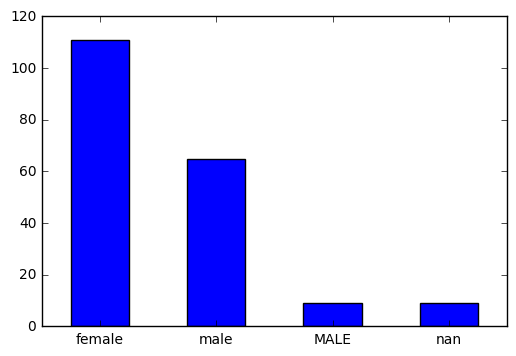

In [17]:
gender.value_counts(dropna=False).plot(kind='bar', rot=0)

## Outliers: 

#### What is the distribution of the heights? 

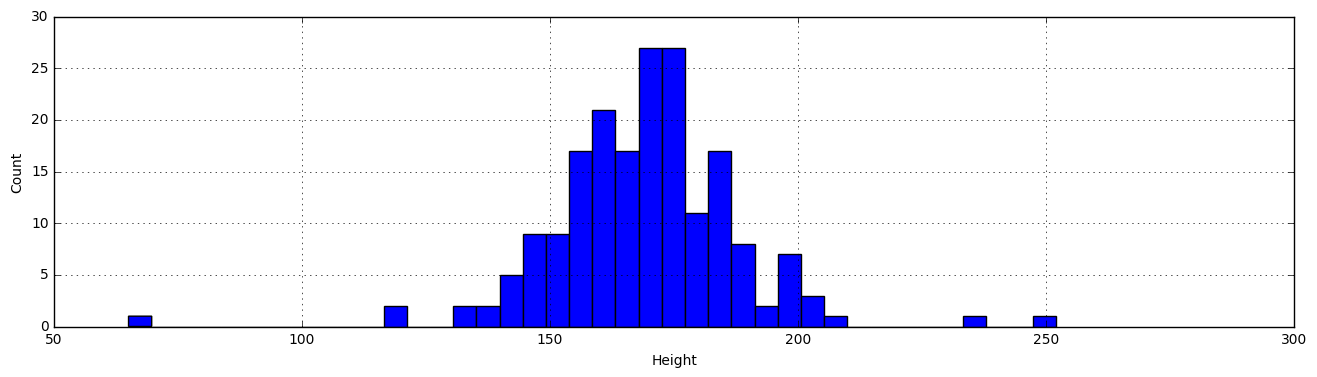

In [18]:
heights.hist(bins=40, figsize=(16,4))
plt.xlabel('Height')
plt.ylabel('Count')

Theory of the normal distribution here

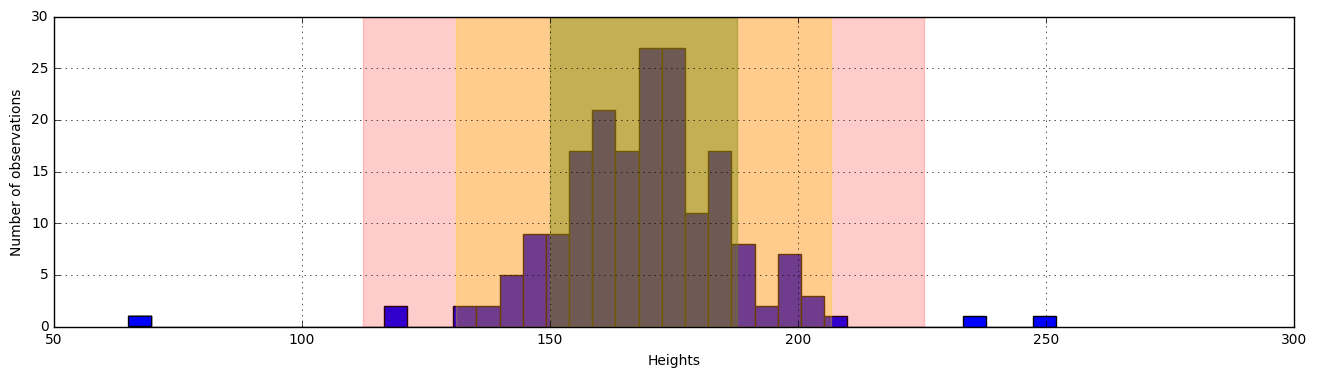

In [19]:
plot_standard_deviations(heights, 'Heights')

In [20]:
print_analysis(heights)

75.25773% of the dataset is under 1 SDs from the mean (188)
94.32990% of the dataset is under 2 SDs from the mean (207)
96.39175% of the dataset is under 3 SDs from the mean (225)


### Who is outside of 2 standard deviations? 

Under: 

In [21]:
heights[heights < heights.mean() - 2*heights.std()]

QMAARXTCCQ     65.0
VYIYVAVHOY    119.0
RPXMEBIHPC    119.0
WTWLZNEVPA    131.0
Name: height, dtype: float64

Over: 

In [22]:
heights[heights > heights.mean() + 2*heights.std()]

ZUMSOSOZUX    252.0
XTGTMAUIMJ    235.0
JFVZOEGUUA    208.0
Name: height, dtype: float64

### And outside 3 standard deviations?

Under: 

In [23]:
heights[heights < heights.mean() - 3*heights.std()]

QMAARXTCCQ    65.0
Name: height, dtype: float64

Over: 

In [24]:
heights[heights > heights.mean() + 3*heights.std()]

ZUMSOSOZUX    252.0
XTGTMAUIMJ    235.0
Name: height, dtype: float64

### How about the ages? 

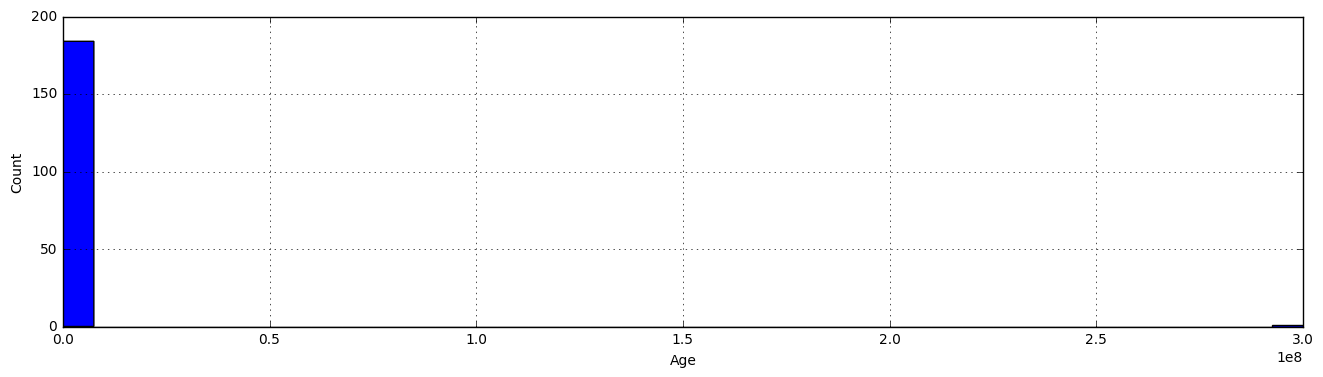

In [25]:
ages.hist(bins=40, figsize=(16,4))
plt.xlabel('Age')
plt.ylabel('Count')

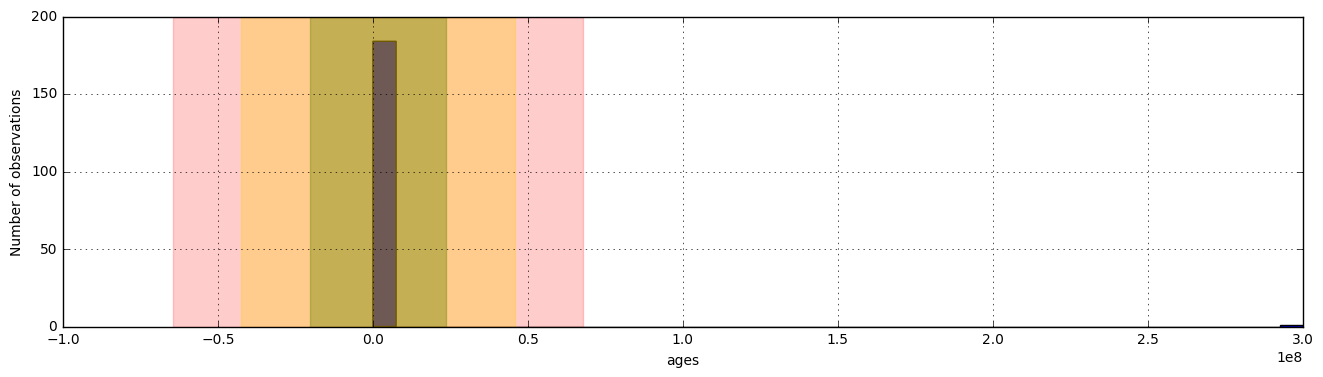

In [26]:
plot_standard_deviations(ages, 'ages')

In [27]:
print_analysis(ages)

94.84536% of the dataset is under 1 SDs from the mean (23678090)
94.84536% of the dataset is under 2 SDs from the mean (45734526)
94.84536% of the dataset is under 3 SDs from the mean (67790963)


# Using the Standard Deviation makes assumptions about the distribution. 

### Let's try to solve this with other means... 

What's the biggest outlier we have? 

In [28]:
ages.max()

300000000.0

What if we used percentiles? 

In [29]:
extreme_value = .999

In [30]:
ages.quantile(extreme_value)

244800041.21600926

In [31]:
under_extreme_value = ages < ages.quantile(extreme_value)

Well this looks a lot more usable:

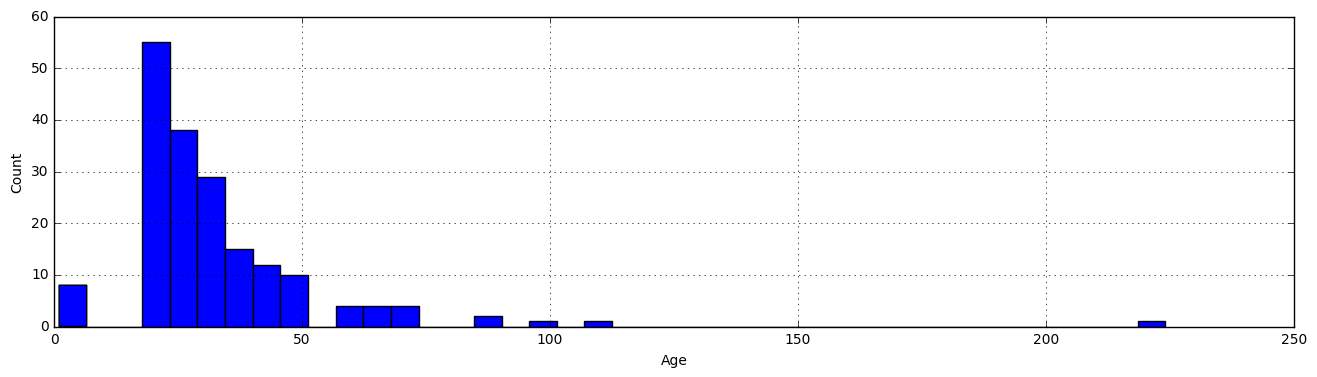

In [32]:
ages[under_extreme_value].hist(bins=40, figsize=(16,4))
plt.xlabel('Age')
plt.ylabel('Count')

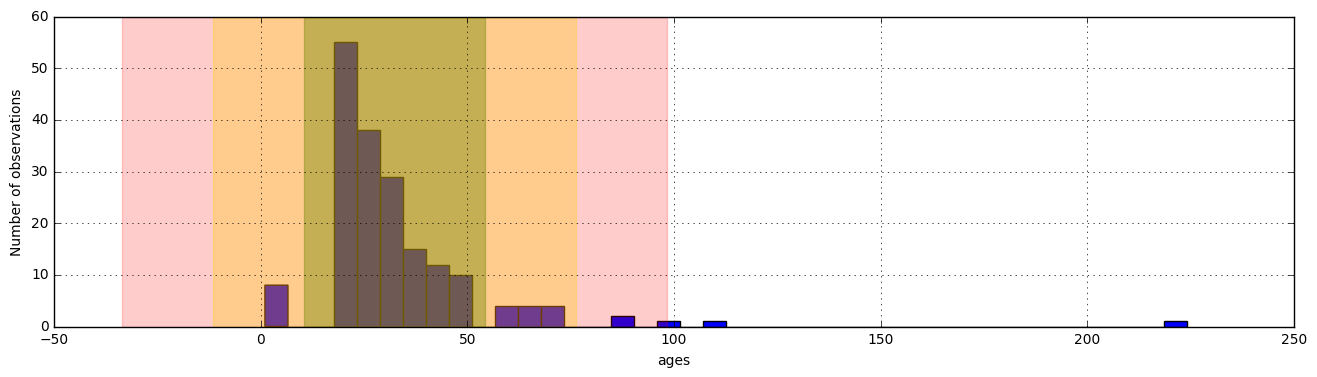

In [33]:
plot_standard_deviations(ages[under_extreme_value], 'ages')

In [34]:
print_analysis(ages[under_extreme_value])

86.41304% of the dataset is under 1 SDs from the mean (54)
97.28261% of the dataset is under 2 SDs from the mean (76)
98.36957% of the dataset is under 3 SDs from the mean (98)


# TODO: 
- analyze the ages further 